In [1]:
import numpy as np
import pandas as pd

In [8]:
!pip install gensim

In [4]:
import gensim
import os

In [5]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []
for filename in os.listdir('data'):
    
    f = open(os.path.join('data',filename))
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))
    

In [83]:
story

[['game',
  'of',
  'thrones',
  'book',
  'one',
  'of',
  'song',
  'of',
  'ice',
  'and',
  'fire',
  'by',
  'george',
  'martin',
  'prologue',
  'we',
  'should',
  'start',
  'back',
  'gared',
  'urged',
  'as',
  'the',
  'woods',
  'began',
  'to',
  'grow',
  'dark',
  'around',
  'them'],
 ['the', 'wildlings', 'are', 'dead'],
 ['do', 'the', 'dead', 'frighten', 'you'],
 ['ser',
  'waymar',
  'royce',
  'asked',
  'with',
  'just',
  'the',
  'hint',
  'of',
  'smile'],
 ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait'],
 ['he',
  'was',
  'an',
  'old',
  'man',
  'past',
  'fifty',
  'and',
  'he',
  'had',
  'seen',
  'the',
  'lordlings',
  'come',
  'and',
  'go'],
 ['dead', 'is', 'dead', 'he', 'said'],
 ['we', 'have', 'no', 'business', 'with', 'the', 'dead'],
 ['are', 'they', 'dead'],
 ['royce', 'asked', 'softly'],
 ['what', 'proof', 'have', 'we'],
 ['will', 'saw', 'them', 'gared', 'said'],
 ['if',
  'he',
  'says',
  'they',
  'are',
  'dead',
  'that',
  'proof',


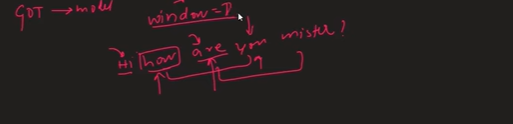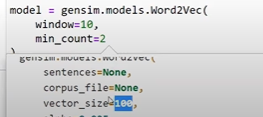

these are window size(in a window target ke left or right mai kitne element honge) and vector size(size of the hidden layer or the vector size we want for particular word)

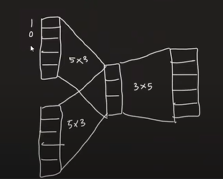

In [7]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [8]:
model.build_vocab(story)

In [9]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(6570262, 8628190)

In [10]:
model.wv.most_similar('daenerys')

[('stormborn', 0.824600100517273),
 ('unburnt', 0.7458840608596802),
 ('targaryen', 0.7374287247657776),
 ('princess', 0.7150521278381348),
 ('queen', 0.7111046314239502),
 ('myrcella', 0.6616984605789185),
 ('elia', 0.6537615656852722),
 ('viserys', 0.6392196416854858),
 ('margaery', 0.6376862525939941),
 ('prince', 0.6282042264938354)]

In [11]:
model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [12]:
model.wv.doesnt_match(['cersei', 'jaime', 'bronn', 'tyrion'])

'bronn'

In [86]:
model.wv['king']

array([ 2.4875841e-01, -8.8163890e-02,  9.3605888e-01,  1.1240636e-01,
       -7.4572496e-02, -4.9442795e-01,  1.5671396e+00,  2.8411689e-01,
       -2.8961890e+00, -2.0570817e+00, -1.6233990e+00, -3.6184502e-01,
       -1.6352962e-01,  9.7466540e-01, -3.3926907e+00, -1.0531948e+00,
       -5.9269473e-02,  2.4604287e+00,  9.5814282e-01, -2.2537042e-01,
        2.3251541e+00, -1.4696712e+00,  1.9399117e+00, -4.0940037e+00,
       -2.9924786e+00,  8.9325619e-01, -5.0325972e-01, -1.1603191e+00,
        9.8483935e-02,  6.0780460e-01, -2.4625690e+00,  1.0579656e+00,
        3.4713662e-01, -3.5374838e-01,  2.4569125e+00, -4.4478273e+00,
       -1.2213124e+00, -6.1450374e-01,  1.0613594e+00, -9.6458697e-01,
       -7.0423180e-01,  2.7006767e+00,  3.8996029e+00,  4.6125600e-01,
       -9.4286841e-01,  4.0837029e-01,  1.2528377e+00, -2.7553284e-01,
        3.6795714e+00, -1.8836396e+00, -3.8256779e+00, -1.5379311e+00,
       -1.3536565e+00, -4.3191433e+00,  2.9384570e+00, -1.5071547e-01,
      

In [14]:
model.wv.similarity('arya','sansa')

0.8534194

In [15]:
model.wv.similarity('cersei','sansa')

0.7394308

In [16]:
model.wv.similarity('tywin','sansa')

0.26445806

In [88]:
model.wv.get_normed_vectors()

array([[-0.11974421, -0.18864349,  0.20628448, ..., -0.11863696,
         0.00497017,  0.02195935],
       [-0.25077537, -0.03254947,  0.22424528, ..., -0.10946808,
         0.02671707,  0.08537447],
       [ 0.06232982, -0.02960947, -0.04660568, ..., -0.09887758,
         0.09963721, -0.08160619],
       ...,
       [-0.03013285,  0.04750119, -0.01497496, ...,  0.00407487,
         0.01391101,  0.05480921],
       [-0.00955141,  0.07727367,  0.11235627, ..., -0.03055063,
        -0.00149143, -0.13749485],
       [-0.04895716,  0.05263472,  0.12851088, ..., -0.05369092,
         0.09577035, -0.07121768]], dtype=float32)

In [64]:
y = model.wv.index_to_key

In [90]:
y

['the',
 'and',
 'to',
 'of',
 'he',
 'his',
 'was',
 'you',
 'her',
 'in',
 'it',
 'had',
 'that',
 'she',
 'as',
 'with',
 'him',
 'not',
 'but',
 'for',
 'they',
 'is',
 'at',
 'on',
 'said',
 'my',
 'have',
 'be',
 'lord',
 'them',
 'no',
 'from',
 'would',
 'were',
 'me',
 'your',
 'one',
 'all',
 'when',
 'will',
 'ser',
 'if',
 'so',
 'their',
 'we',
 'could',
 'are',
 'man',
 'there',
 'this',
 'up',
 'been',
 'what',
 'did',
 'by',
 'king',
 'do',
 'men',
 'back',
 'out',
 'more',
 'or',
 'who',
 'down',
 'well',
 'than',
 'only',
 'like',
 'jon',
 'some',
 'father',
 'old',
 'hand',
 'even',
 'too',
 'tyrion',
 'before',
 'never',
 'an',
 'off',
 'see',
 'know',
 'into',
 'made',
 'now',
 'eyes',
 'black',
 'told',
 'lady',
 'thought',
 'time',
 'then',
 'how',
 'long',
 'has',
 'can',
 'might',
 'us',
 'come',
 'where',
 'here',
 'through',
 'still',
 'face',
 'head',
 'red',
 'll',
 'way',
 'boy',
 'page',
 'must',
 'once',
 'queen',
 'good',
 'two',
 'brother',
 'night',
 

For visuale representation
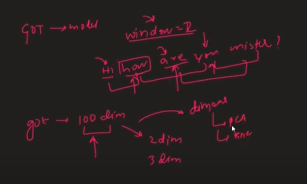

In [67]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components=3)

In [72]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [91]:
X.shape

(17453, 3)

In [93]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()